In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\HW\Downloads\twitter_training.csv\twitter_training.csv")

In [3]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df.columns = ['id', 'game', 'sentiment', 'text']

In [11]:
df.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [23]:
df.head()

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
id_types = df['id'].value_counts()
id_types


id
5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: count, Length: 12447, dtype: int64

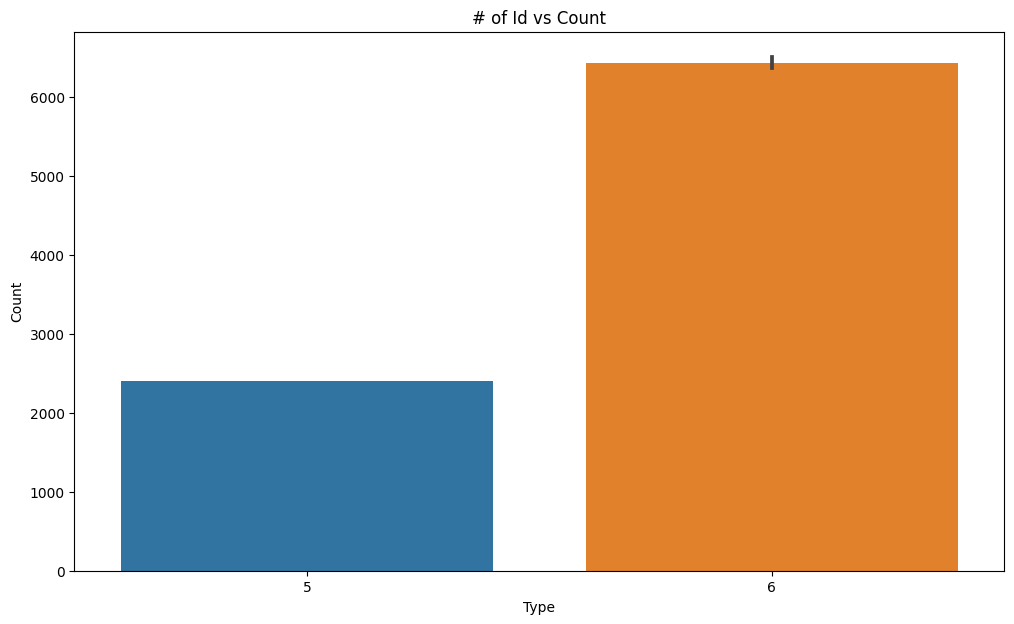

In [13]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [14]:
game_types = df['game'].value_counts()
game_types

game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

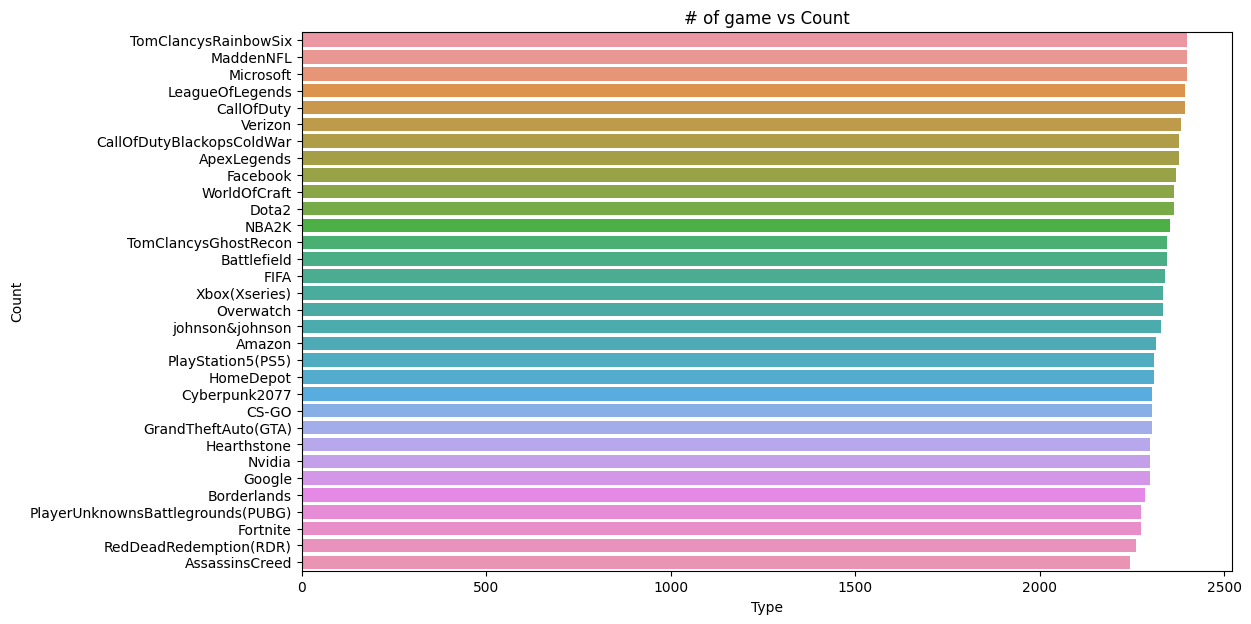

In [15]:
plt.figure(figsize=(12,7))
sns.barplot(y=game_types.index, x=game_types.values)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of game vs Count')
plt.show()

In [19]:
df.isnull().sum().sort_values(ascending = False)

text         686
id             0
game           0
sentiment      0
dtype: int64

In [22]:
df.dropna(subset = ['text'],inplace = True)
df.isnull().sum().sort_values(ascending = False)

id           0
game         0
sentiment    0
text         0
dtype: int64

In [25]:
sentiment_types = df['sentiment'].value_counts()
sentiment_types

sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

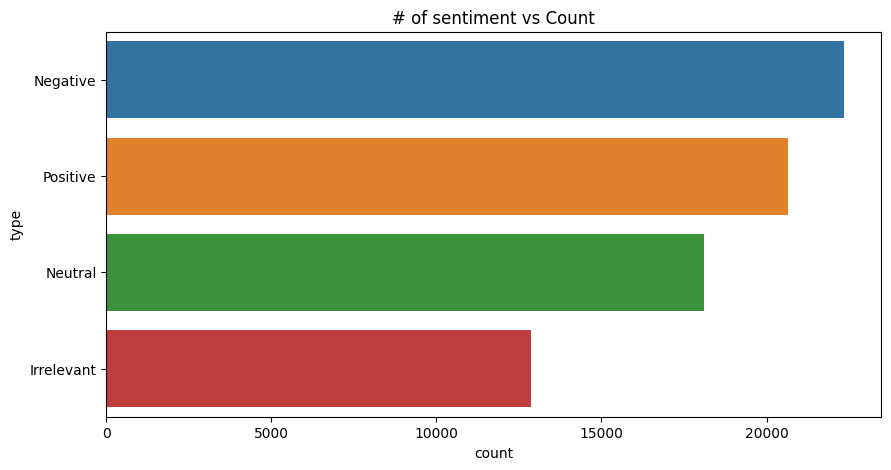

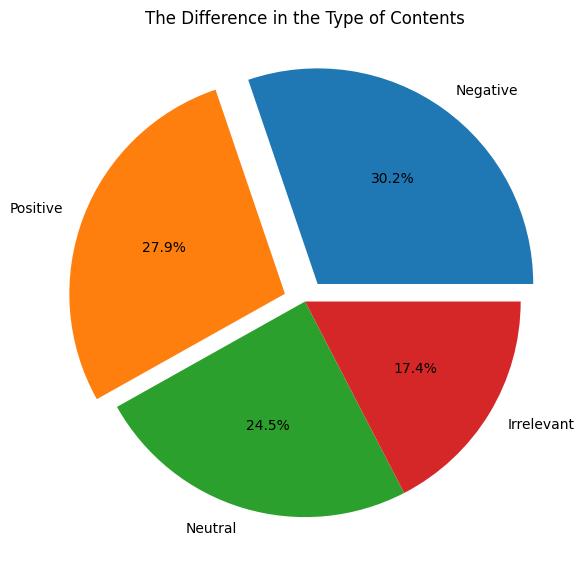

In [33]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [40]:
df['sentiment']=label_encoder.fit_transform(df['sentiment'])
df['game']=label_encoder.fit_transform(df['game'])

In [41]:
df = df.drop(['id'],axis=1)

df

,game,sentiment,text
0,4,3,I am coming to the borders and I will kill you...
1,4,3,im getting on borderlands and i will kill you ...
2,4,3,im coming on borderlands and i will murder you...
3,4,3,im getting on borderlands 2 and i will murder ...
4,4,3,im getting into borderlands and i can murder y...
...,...,...,...
74676,21,3,Just realized that the Windows partition of my...
74677,21,3,Just realized that my Mac window partition is ...
74678,21,3,Just realized the windows partition of my Mac ...
74679,21,3,Just realized between the windows partition of...


In [43]:
df.nunique()

game            32
sentiment        4
text         69490
dtype: int64